---
## Implementación del Modelo utilizando sólo los datos de entrenamiento, con una partición de 90/10 para entrenamiento y prueba

**Importación del dataset**

In [1]:
# Importamos la librería Pandas para trabajar con datos tabulares
import pandas as pd 

# Importamos el módulo PricePredictionModel con la lógica de nuestro modelo de predicción de precios
import PricePredictionModel as model 

# Definimos la URL del archivo de datos en formato Excel que se encuentra en un repositorio de GitHub
url = r"https://raw.githubusercontent.com/yakincc/BBVA_PricePrediction_Abehackers/master/Database/dataset_tasacion_train.xlsx"
#file = r"C:\Users\yakin\OneDrive\Escritorio\BBVA_DataDriven_Abehackers\dataset_tasacion_train.xlsx"

# Leemos el archivo Excel utilizando la función read_excel de Pandas, indicando que el encabezado está en la fila 0 y que los miles están separados por comas
df = pd.read_excel(url, header=0, thousands=",")
df

,Fecha entrega del Informe,Calle,Piso,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),...,Posición,Número de frentes,Edad,Elevador,Estado de conservación,Método Representado,Moneda principal para cálculos,Área Terreno,Área Construcción,Valor comercial
0,2016-09-01 19:00:00,REBECA OQUENDO,NaN,Lima,Lima,Breña,1.0,0.0,-12.059545,-77.046595,...,NaN,NaN,4.0,NaN,NaN,Comparación de mercado (directo),NaN,15.91,65.30,83754
1,2021-03-11 19:00:00,CONDOMINIO DOSS,NaN,Lima,Lima,Comas,0.0,0.0,-11.937662,-77.066525,...,NaN,NaN,0.0,NaN,En proyecto,Comparación de mercado (directo),NaN,8.12,91.78,85355
2,2019-03-18 19:00:00,MANZANA 14 LT 10 LOS JARDINES DEL GOLF,NaN,La Libertad,Trujillo,Victor Larco Herrera,0.0,0.0,-8.135306,-79.035518,...,NaN,NaN,12.0,NaN,Regular,Comparación de mercado (directo),NaN,20.51,89.19,83838
3,2019-07-25 19:00:00,TRINIDAD MORAN,NaN,Lima,Lima,Lince,NaN,NaN,-12.089796,-77.039245,...,NaN,NaN,0.0,NaN,En proyecto,Comparación de mercado (directo),NaN,7.48,52.90,111619
4,2018-01-01 19:00:00,MZ 8 AC,NaN,Lima,Lima,Villa María del Triunfo,1.0,0.0,-12.181048,-76.927642,...,NaN,NaN,19.0,NaN,Bueno,Costos o reposición (directo),NaN,240.00,566.00,305191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39614,2021-04-22 19:00:00,ANTONIO MIRO QUESADA,NaN,Lima,Lima,Magdalena del Mar,0.0,0.0,-12.096909,-77.059986,...,NaN,NaN,3.0,NaN,Bueno,Comparación de mercado (directo),NaN,11.00,87.00,149640
39615,2021-05-11 19:00:00,54,NaN,Lima,Lima,San Isidro,0.0,0.0,-12.100624,-77.015457,...,NaN,NaN,50.0,NaN,Bueno,Costos o reposición (directo),NaN,390.00,291.44,818118
39616,2020-11-04 19:00:00,SEPARADORA INDUSTRIAL,NaN,Lima,Lima,Ate,0.0,0.0,-12.054058,-76.942100,...,NaN,NaN,26.0,NaN,Regular,Comparación de mercado (directo),NaN,12.94,94.73,102308
39617,2020-11-05 19:00:00,GENERAL CESAR CANEVARO,NaN,Lima,Lima,Lince,1.0,0.0,-12.084100,-77.036740,...,NaN,NaN,0.0,NaN,En construcción,Comparación de mercado (directo),NaN,5.73,89.64,130257


**Preprocesamiento de los datos**

In [2]:
from sklearn.model_selection import train_test_split

dataset = df.copy()
# Se seleccionan las columnas "Área Terreno" y "Valor comercial" del dataset para eliminar valores atípicos
columnas = ['Área Terreno', 'Valor comercial']

# Se divide el dataset en dos conjuntos de datos: entrenamiento (data_train) y prueba (data_test), utilizando un 10% del dataset como datos de prueba.
# Los datos son mezclados (shuffle=True) antes de dividirlos y se fija una semilla aleatoria (random_state=1) para garantizar reproducibilidad.
data_train, data_test = train_test_split(dataset, test_size = 0.1, shuffle = True, random_state = 1)

# Se preprocesa el dataset mediante la función preprocess de la librería PricePredictionModel
data_train, encoders_dictionary = model.preprocess(data_train, get_encoders = True)
data_test = model.preprocess(data_test)

# Se realiza detección de outliers en los datos de entrenamiento y prueba mediante la función deteccion_outliers de la librería
# PricePredictionModel, utilizando las columnas seleccionadas previamente.
data_train = model.deteccion_outliers(data_train, columnas)
data_test = model.deteccion_outliers(data_test, columnas)

**Data training/test split**

In [3]:
# Separar los datos de entrenamiento en valores objetivo y variables predictoras
y_train = data_train['Valor comercial'].copy()  # variable objetivo
X_train = data_train.copy()  # variables predictoras
X_train = X_train.drop('Valor comercial', axis=1)  # quitar la variable objetivo de las variables predictoras

# Separar los datos de prueba en valores objetivo y variables predictoras
y_test = data_test['Valor comercial'].copy()  # variable objetivo
X_test = data_test.copy()  # variables predictoras
X_test = X_test.drop('Valor comercial', axis=1)  # quitar la variable objetivo de las variables predictoras

**Comprobación del porcentaje de desviación**

In [4]:
import numpy as np

def mean_percentage_error(y_real, y_pred):
    """
    Calcula la métrica de Mean Percentage Error.

    Parameters:
    y_true (array-like): Valores reales.
    y_pred (array-like): Valores estimados.

    Returns:
    mean_percentage_error (float): La métrica de Mean Percentage Error.
    """
    
    df = pd.concat([y_real, y_pred], axis = 1).reset_index(drop = True)    
    df_columns = df.columns.to_list()
    df = df.rename(columns = {df_columns[0] : 'y_real', df_columns[1] : 'y_pred'})
    df['Variación Porcentual'] = df.apply(lambda row: ((row['y_real'] - row['y_pred']) / row['y_real'] * 100), axis=1)

    return df['Variación Porcentual'].mean()

def add_metrics(y_real, y_pred, real_column, predicted_column, output_file):   
    """
    Agrega dos métricas al DataFrame y guarda el resultado en un archivo Excel.
    
    Parameters
    ----------
    y_real : pandas.core.series.Series
        Serie con los valores reales.
    y_pred : pandas.core.series.Series
        Serie con los valores predichos.
    real_column : str
        Nombre de la columna de valores reales.
    predicted_column : str
        Nombre de la columna de valores predichos.
    output_file : str
        Ruta donde se guardará el archivo Excel con el resultado.
    
    Returns
    -------
    None
    
    """
    # Unir los dos dataframes por columna
    df = pd.concat([y_real, y_pred], axis = 1).reset_index(drop = True)
    
    # Calcular la variación porcentual
    df['Variación Porcentual'] = df.apply(lambda row: ((row[real_column] - row[predicted_column]) / row[real_column] * 100), axis=1)
    
    # Verificar si la variación porcentual es mayor a 20% y crear la columna correspondiente
    df['Mayor a 20%'] = df['Variación Porcentual'].apply(lambda x: 0 if (x > 20 or x < -20) else 1)
    
    #Cálculo del promedio para cada columna
    promedio_variacion = df['Variación Porcentual'].mean()
    promedio_mayor_a_20 = df['Mayor a 20%'].mean()*100
    new_row = [np.nan, 'Promedio', promedio_variacion, promedio_mayor_a_20]
    new_row = pd.DataFrame([new_row], columns = df.columns)
    
    # Agrega los resultados al final del DataFrame
    df = pd.concat([df,new_row], axis = 0)
    
    # Guardar el dataframe en un archivo de Excel
    df.to_excel(output_file, index = False)

def performance_by_drivers(data, model, driver, column, target_column, file = True, output_path = 'output.xlsx', else_compare = False):
    """
    Separa el DataFrame en dos (uno para el driver en cuestión y otro para los demás drivers), y evalúa el rendimiento del modelo para ambos DataFrames. Si se especifica, también guarda las métricas en un archivo Excel.
    
    Parameters
    ----------
    data : pandas.core.frame.DataFrame
        DataFrame con los datos.
    model : sklearn.ensemble.forest.RandomForestRegressor
        Modelo entrenado.
    driver : object
        Valor del driver a evaluar.
    column : str
        Nombre de la columna de los drivers.
    target_column : str
        Nombre de la columna de los valores reales.
    file : bool, optional
        Si es True, guarda las métricas en un archivo Excel (por defecto es True).
    output_path : str, optional
        Ruta donde se guardará el archivo Excel con el resultado (por defecto es 'output.xlsx').
    
    Returns
    -------
    None
    
    """    
    #Separación de los datos por driver
    if else_compare == True:
        df_driver = data.loc[data[column] != driver]
    else:
        df_driver = data.loc[data[column] == driver]
                
    #Prueba por drivers:
    df = df_driver
    y_test = df[target_column].reset_index(drop = True)
    X_test = df.drop([target_column], axis = 1).reset_index(drop = True)
    
    #Predicción dada por el modelo 
    y_pred = pd.DataFrame(model.predict(X_test), columns = [str(target_column) + ' (Modelo)'])
    
    if file == True:
        add_metrics(y_test, y_pred, real_column = target_column, predicted_column = target_column + ' (Modelo)', output_file = output_path)
        
    #Evaluación del rendimiento del modelo
    return mean_percentage_error(y_test, y_pred)

**Implementación del modelo y evaluación de la métrica MPE para los datos globales**

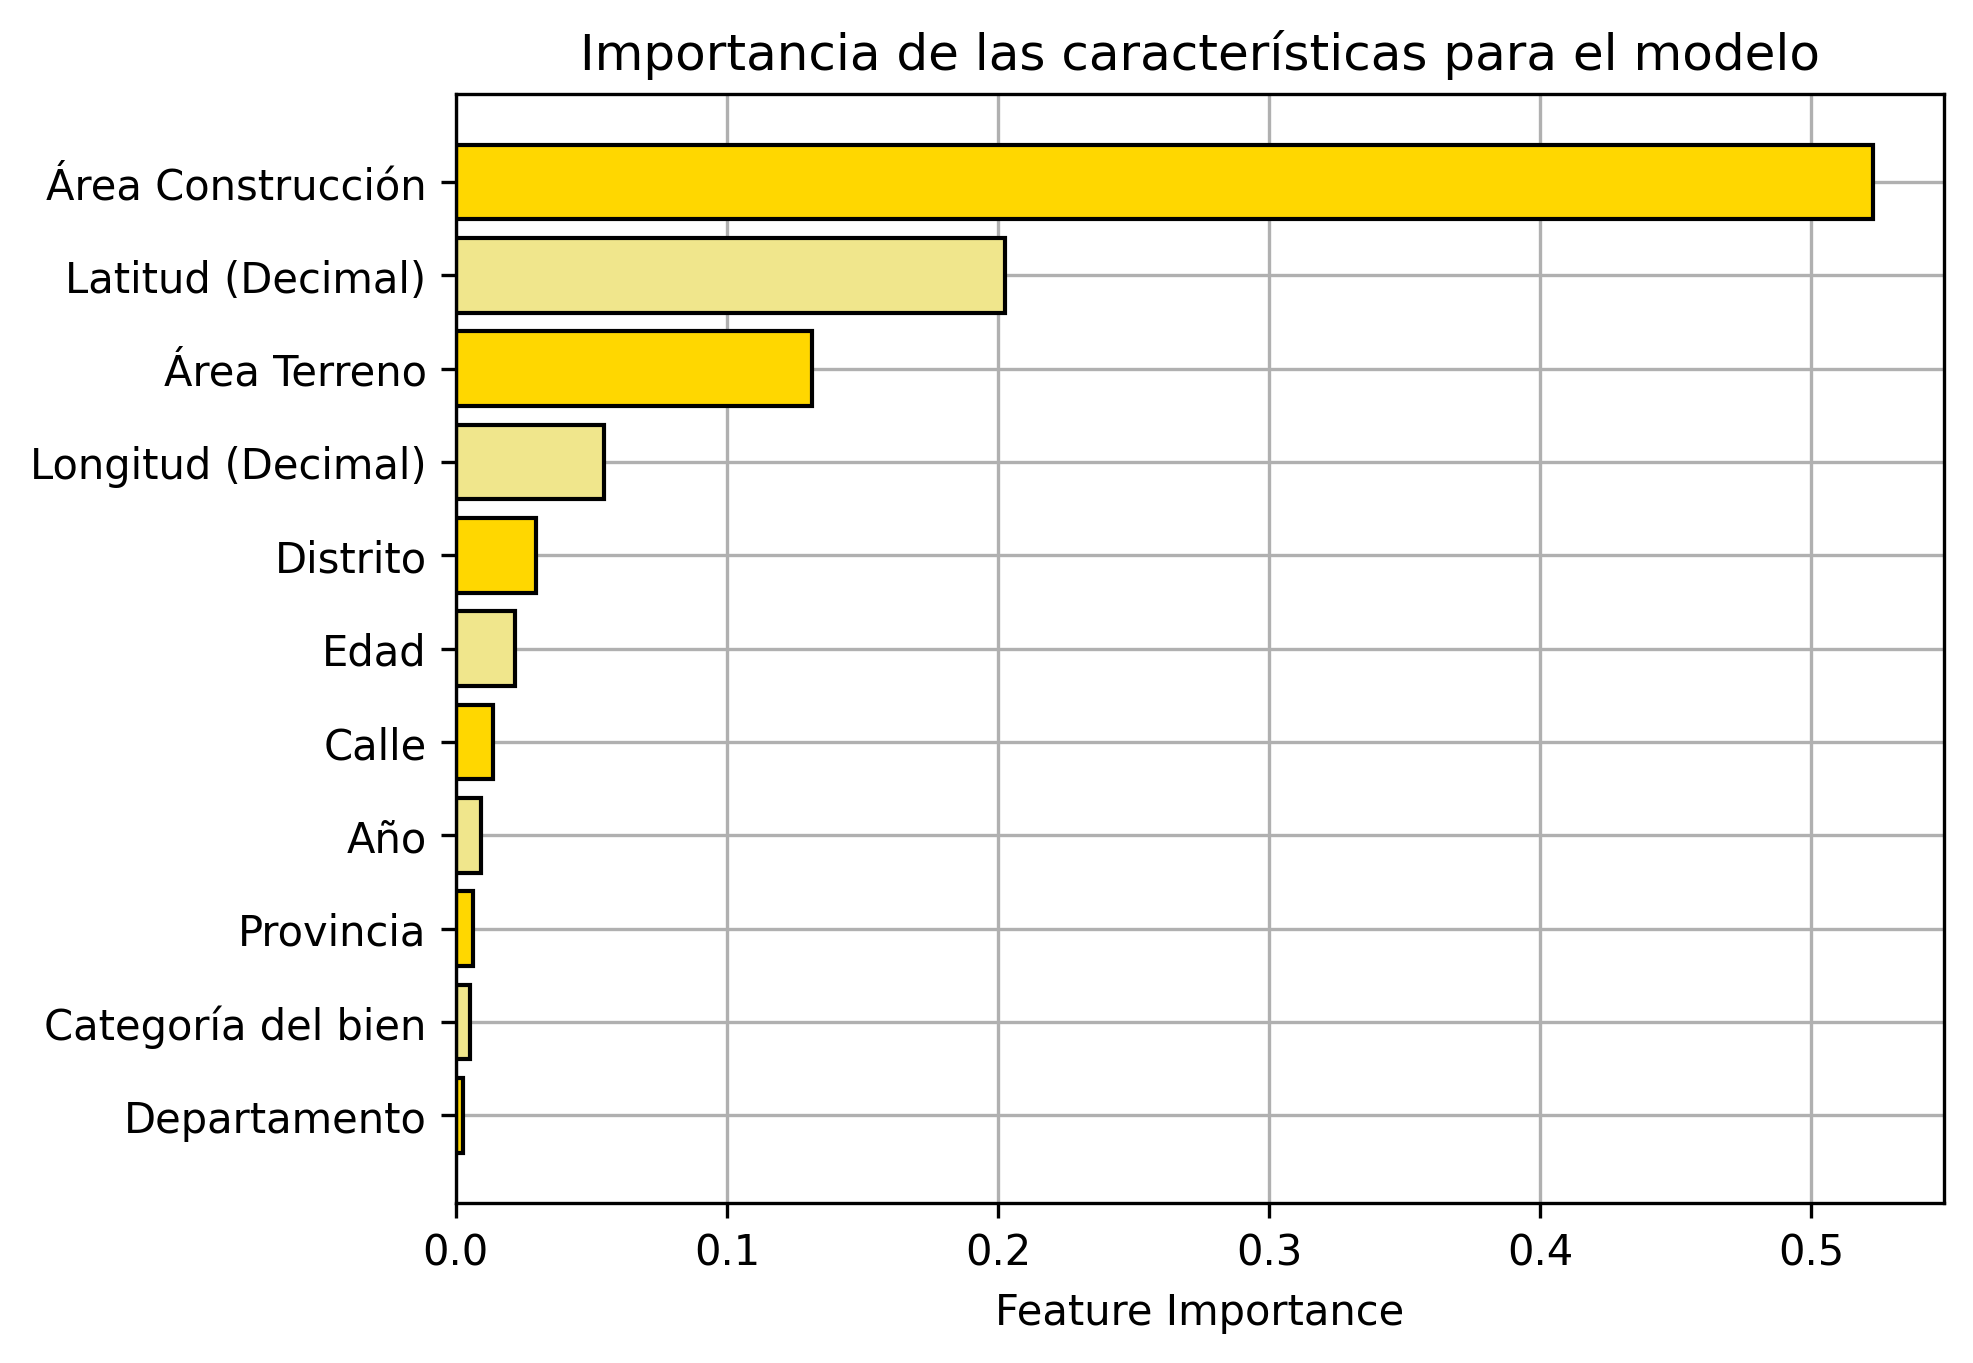

MPE score para el conjunto de entrenamiento: -3.252092861371621
MPE score para el conjunto de prueba: -61.58768696996876


In [5]:
# Importar el modelo RandomForestRegressor de la librería scikit-learn
from sklearn.ensemble import RandomForestRegressor
# Importar la librería matplotlib para visualizar los resultados
import matplotlib.pyplot as plt

# Crear un objeto de RandomForestRegressor con los hiperparámetros óptimos encontrados previamente
rf_best = model.PricePredictionModel()

# Entrenar el modelo con los datos de entrenamiento X_train e y_train
rf_best.fit(X_train, y_train)

# Obtener el índice de la importancia de cada característica en orden ascendente
sorted_idx = rf_best.model.feature_importances_.argsort()

# Crear una figura con una resolución de 300 dpi
plt.figure(dpi=300)

# Crear un gráfico de barras horizontales que muestre la importancia de las características en orden ascendente
plt.barh(X_train.columns[sorted_idx], rf_best.model.feature_importances_[sorted_idx], edgecolor='black', color=['gold', 'khaki'])

# Establecer atributos extra del gráfico
plt.xlabel('Feature Importance')
plt.title('Importancia de las características para el modelo')
plt.grid(True)
plt.gca().set_axisbelow(True)

# Mostrar el gráfico
plt.show()

#Calcular la métrica MAPE para los datos de entrenamiento
y_pred_train = pd.DataFrame(rf_best.predict(X_train), columns = ['Valor comercial (Modelo)'])
y_train = pd.DataFrame(y_train)
y_train = y_train.reset_index(drop = True)
mpe_train = mean_percentage_error(y_train, y_pred_train)
print(f"MPE score para el conjunto de entrenamiento: {mpe_train}")
add_metrics(y_train, y_pred_train,'Valor comercial', 'Valor comercial (Modelo)', 'resultados_Global_Train.xlsx')

# Predecir los valores de y para los datos de prueba X_test utilizando el modelo entrenado
y_pred = pd.DataFrame(rf_best.predict(X_test), columns = ['Valor comercial (Modelo)'])

# Calcular y mostrar el error porcentual absoluto medio (MPE) de las predicciones
mpe_test = mean_percentage_error(y_test, y_pred)  
print(f"MPE score para el conjunto de prueba: {mpe_test}")

# Crear un dataframe con los valores reales de y de los datos de prueba y resetear sus índices
y_test = pd.DataFrame(y_test)
y_test = y_test.reset_index(drop = True)

# Crear un documento xlsx que calcule el MAPE para cada instancia de prueba y si están o no dentro del 20% de Error
add_metrics(y_test, y_pred,'Valor comercial', 'Valor comercial (Modelo)', 'resultados_Global_Test.xlsx')

**Segmentación por Drivers: Lima vs Resto de Perú**

In [6]:
#Cálculo de métricas por Drivers para el segmento de entrenamiento
lima_coded = encoders_dictionary['Departamento']['Lima']
departamento_coded = encoders_dictionary['Categoría del bien']['Departamento']
vivienda_coded = encoders_dictionary['Categoría del bien']['Vivienda Unifamiliar']

performance_lima = performance_by_drivers(data = data_train, model = rf_best, driver = lima_coded, column = 'Departamento', target_column = 'Valor comercial', file = True, output_path = 'resultados_Lima_Train.xlsx', else_compare = False)
print(f'El rendimiento del entrenamiento para Lima es de: {performance_lima}')
performance_resto_peru = performance_by_drivers(data = data_train, model = rf_best, driver = lima_coded, column = 'Departamento', target_column = 'Valor comercial', file = True, output_path = 'resultados_RestoPeru_Train.xlsx', else_compare = True)
print(f'El rendimiento del entrenamiento para el resto de Perú es de: {performance_resto_peru}')
performance_departamento = performance_by_drivers(data = data_train, model = rf_best, driver = departamento_coded, column = 'Categoría del bien', target_column = 'Valor comercial', file = True, output_path = 'resultados_Departamento_Train.xlsx', else_compare = False)
print(f'El rendimiento del entrenamiento para Departamentos es de: {performance_departamento}')
performance_vivienda = performance_by_drivers(data = data_train, model = rf_best, driver = vivienda_coded, column = 'Categoría del bien', target_column = 'Valor comercial', file = True, output_path = 'resultados_Vivienda_Train.xlsx', else_compare = False)
print(f'El rendimiento del entrenamiento para Viviendas Unifamiliares es de: {performance_vivienda}')

El rendimiento del entrenamiento para Lima es de: -2.4102193460272776
El rendimiento del entrenamiento para el resto de Perú es de: -6.440588239680417
El rendimiento del entrenamiento para Departamentos es de: -2.2566619348292085
El rendimiento del entrenamiento para Viviendas Unifamiliares es de: -5.384437748749183


In [7]:
#Cálculo de métricas por Drivers para el segmento de prueba
#Cálculo de métricas por Drivers para el segmento de entrenamiento
lima_coded = encoders_dictionary['Departamento']['Lima']
departamento_coded = encoders_dictionary['Categoría del bien']['Departamento']
vivienda_coded = encoders_dictionary['Categoría del bien']['Vivienda Unifamiliar']

performance_lima = performance_by_drivers(data = data_test, model = rf_best, driver = lima_coded, column = 'Departamento', target_column = 'Valor comercial', file = True, output_path = 'resultados_Lima_Test.xlsx', else_compare = False)
print(f'El rendimiento de la prueba para Lima es de: {performance_lima}')
performance_resto_peru = performance_by_drivers(data = data_test, model = rf_best, driver = lima_coded, column = 'Departamento', target_column = 'Valor comercial', file = True, output_path = 'resultados_RestoPeru_Test.xlsx', else_compare = True)
print(f'El rendimiento de la prueba para el resto de Perú es de: {performance_resto_peru}')
performance_departamento = performance_by_drivers(data = data_test, model = rf_best, driver = departamento_coded, column = 'Categoría del bien', target_column = 'Valor comercial', file = True, output_path = 'resultados_Departamento_Test.xlsx', else_compare = False)
print(f'El rendimiento de la prueba para Departamentos es de: {performance_departamento}')
performance_vivienda = performance_by_drivers(data = data_test, model = rf_best, driver = vivienda_coded, column = 'Categoría del bien', target_column = 'Valor comercial', file = True, output_path = 'resultados_Vivienda_Test.xlsx', else_compare = False)
print(f'El rendimiento de la prueba para Viviendas Unifamiliares es de: {performance_vivienda}')


El rendimiento de la prueba para Lima es de: -5.62514508181391
El rendimiento de la prueba para el resto de Perú es de: -14.793472484270366
El rendimiento de la prueba para Departamentos es de: -5.770009145019774
El rendimiento de la prueba para Viviendas Unifamiliares es de: -11.394421531412776


**Validación cruzada del modelo**

In [8]:
import numpy as np


def cross_val_score(X, y, model, metric, cv=5):
    """
    Realiza la validación cruzada y devuelve la métrica de evaluación promedio.
    
    Parameters:
    X (pandas.DataFrame): DataFrame de características.
    y (pandas.DataFrame): DataFrame de valores objetivo.
    model: El modelo a utilizar.
    metric: La métrica a utilizar.
    cv (int): El número de folds en la validación cruzada.
    
    Returns:
    mean_score (float): La métrica promedio de validación cruzada.
    """
    scores = []
    n_samples = X.shape[0]
    fold_size = n_samples // cv
    indices = list(range(n_samples))
    for i in range(cv):
        start = i * fold_size
        end = start + fold_size
        val_indices = indices[start:end]
        train_indices = indices[:start] + indices[end:]
        X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
        X_val, y_val = X.iloc[val_indices], y.iloc[val_indices]
        y_train = np.ravel(y_train)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = metric(y_val, pd.DataFrame(y_pred, index=y_val.index, columns=['y_pred']))
        scores.append(score)
    mean_score = sum(scores) / len(scores)
    return mean_score, scores

In [9]:
#Implementación de una validación cruzada usando MPE como métrica
mean_score, scores = cross_val_score(X_train, y_train, rf_best, mean_percentage_error, cv=10)

# Imprimir el resultado de la validación cruzada
print(f" MPE (Train - CV): {mean_score} %")
print(f" Scores para cada partición: \n{np.array(scores)}")

 MPE (Train - CV): -7.233131264218923 %
 Scores para cada partición: 
[-7.17001015 -7.15659354 -7.28409186 -6.71068529 -8.07749485 -5.78993276
 -7.12033809 -7.25754086 -6.96137799 -8.80324724]


---
## Implementación del Modelo para la predicción de un conjunto nuevo de datos

Para esta sección del Notebook, se presenta la implementación Pythonica del modelo Random Forest Regresor de la librería PricePredictionModel, junto con la evaluación de las métricas del conjunto de datos de manera global y por Drivers para el entrenamiento. 

In [10]:
import PricePredictionModel as PPM
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

train_file = r'C:\Users\yakin\OneDrive\Escritorio\BBVA_DataDriven_Abehackers\Database\dataset_tasacion_train.xlsx'
test_file = r'C:\Users\yakin\OneDrive\Escritorio\BBVA_DataDriven_Abehackers\Database\dataset_tasacion_test (1).xlsx'
data_train = pd.read_excel(train_file, header=0, thousands=",")
data_test = pd.read_excel(test_file, header=0, thousands=",")
data_test = data_test.drop('ID', axis= 1)

columnas = ['Área Terreno', 'Valor comercial']
data_train, encoders_dictionary = PPM.preprocess(data_train, get_encoders = True)
data_test = PPM.preprocess(data_test, previous_cleaning = False, encoders_dictionary = encoders_dictionary)
data_train = PPM.deteccion_outliers(data_train, columnas)

# Separar los datos de entrenamiento en valores objetivo y variables predictoras
y_train = data_train['Valor comercial'].copy()  # variable objetivo
X_train = data_train.copy()  # variables predictoras
X_train = X_train.drop('Valor comercial', axis=1)  # quitar la variable objetivo de las variables predictoras
# Separar los datos de prueba en valores objetivo y variables predictoras
y_test = data_test['Valor comercial'].copy()  # variable objetivo
X_test = data_test.copy()  # variables predictoras
X_test = X_test.drop('Valor comercial', axis=1)  # quitar la variable objetivo de las variables predictoras

rf = PPM.PricePredictionModel()
rf.fit(X_train, y_train)

y_pred_train = pd.DataFrame(rf.predict(X_train), columns = ['Valor comercial (Modelo)'])
y_train = pd.DataFrame(y_train, columns = ['Valor comercial'])
y_train = y_train.reset_index(drop = True)

mpe_train = mean_percentage_error(y_train, y_pred_train)
print(f"MPE score para el conjunto de entrenamiento: {mpe_train}")
add_metrics(y_train, y_pred_train,'Valor comercial', 'Valor comercial (Modelo)', 'resultados_Global_Train(Completo).xlsx')

# Predecir los valores de y para los datos de prueba X_test utilizando el modelo entrenado
y_pred_test = pd.DataFrame(rf.predict(X_test, xlsx_output = True), columns = ['Valor comercial (Modelo)'])

#Almacenamiento del modelo en un archivo .pkl
rf.save_model('Hive_price.pkl.gz')

MPE score para el conjunto de entrenamiento: -3.180422114082845


**Cálculo de métricas para el entrenamiento por drivers**

In [11]:
lima_coded = encoders_dictionary['Departamento']['Lima']
departamento_coded = encoders_dictionary['Categoría del bien']['Departamento']
vivienda_coded = encoders_dictionary['Categoría del bien']['Vivienda Unifamiliar']

performance_lima = performance_by_drivers(data = data_train, model = rf, driver = lima_coded, column = 'Departamento', target_column = 'Valor comercial', file = True, output_path = 'resultados_Lima_Train (Completo).xlsx', else_compare = False)
print(f'El rendimiento del entrenamiento para Lima es de: {performance_lima}')
performance_resto_peru = performance_by_drivers(data = data_train, model = rf, driver = lima_coded, column = 'Departamento', target_column = 'Valor comercial', file = True, output_path = 'resultados_RestoPeru_Train (Completo).xlsx', else_compare = True)
print(f'El rendimiento del entrenamiento para el resto de Perú es de: {performance_resto_peru}')
performance_departamento = performance_by_drivers(data = data_train, model = rf, driver = departamento_coded, column = 'Categoría del bien', target_column = 'Valor comercial', file = True, output_path = 'resultados_Departamento_Train (Completo).xlsx', else_compare = False)
print(f'El rendimiento del entrenamiento para Departamentos es de: {performance_departamento}')
performance_vivienda = performance_by_drivers(data = data_train, model = rf, driver = vivienda_coded, column = 'Categoría del bien', target_column = 'Valor comercial', file = True, output_path = 'resultados_Vivienda_Train (Completo).xlsx', else_compare = False)
print(f'El rendimiento del entrenamiento para Viviendas Unifamiliares es de: {performance_vivienda}')

El rendimiento del entrenamiento para Lima es de: -2.3640536915070784
El rendimiento del entrenamiento para el resto de Perú es de: -6.281194432095882
El rendimiento del entrenamiento para Departamentos es de: -2.1842521158504464
El rendimiento del entrenamiento para Viviendas Unifamiliares es de: -5.326108395989831


In [12]:
y_pred_train = rf.pipeline(X = X_train, model_path = 'Hive_price.pkl.gz',  encoder_path = 'encoders.json', data_preprocess = False, return_y = True, retrain = False, xlsx_output = False)

y_train = pd.DataFrame(y_train, columns = ['Valor comercial'])
y_train = y_train.reset_index(drop = True)

mpe_train = mean_percentage_error(y_train, y_pred_train)
print(f"MPE score para el conjunto de entrenamiento: {mpe_train}")

MPE score para el conjunto de entrenamiento: -3.180422114082845


**Implementación del pipeline para la predicción de datos nuevos**

In [13]:
#Importación de los datos
test_file = r'C:\Users\yakin\OneDrive\Escritorio\BBVA_DataDriven_Abehackers\Database\dataset_tasacion_test (1).xlsx'

#Separación en entrenamiento y prueba
data_test = pd.read_excel(test_file, header=0, thousands=",")
data_test = data_test.drop(['ID', 'Valor comercial'], axis= 1)

#Implementación del pipeline para generar las predicciones sobre la prueba.
y_pred_test = rf.pipeline(X = data_test, model_path = 'Hive_price.pkl.gz',  encoder_path = 'encoders.json', data_preprocess = True, return_y = True, retrain = False, xlsx_output = True, output_path = 'TEST_PREDICTIONS_PIPELINE.xlsx')

**Reentrenamiento del modelo utilizando el pipeline**

In [14]:
#Importación de los datos
test_file = r'C:\Users\yakin\OneDrive\Escritorio\BBVA_DataDriven_Abehackers\Database\dataset_tasacion_test (1).xlsx'
train_file = r'C:\Users\yakin\OneDrive\Escritorio\BBVA_DataDriven_Abehackers\Database\dataset_tasacion_train.xlsx'

#Lectura de los datos
data_test = pd.read_excel(test_file, header=0, thousands=",")
data_test = data_test.drop(['ID', 'Valor comercial'], axis= 1)

rf.pipeline(X = data_test, model_path = 'Hive_price.pkl.gz',  encoder_path = 'encoders.json', train_data_path = train_file, data_preprocess = True, return_y = False, retrain = True, xlsx_output = False)

c:\Users\yakin\OneDrive\Escritorio\BBVA_DataDriven_Abehackers\Code\PricePredictionModel.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.model.fit(X_train, y_train)
